# <center><b>Graduate Rotational Internship Program 
# <center>The Sparks Foundation 
## <center>"july21" batch of "data science and business analytics" 

# <b>task1 : 
# Prediction using Supervised ML

## Predict the percentage of an student based on the no. of study hours. 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### import dataset


In [2]:
dataset= pd.read_csv('http://bit.ly/w-data')
dataset.head(7)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88


## know your dataset

In [4]:
dataset.shape

(25, 2)

In [5]:
dataset.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


#### "so in our dataset we have two columns with 25 non null rows"
##### Hours: independent  variable or predictor 
##### scores: dependent and output variable

## plot dataset

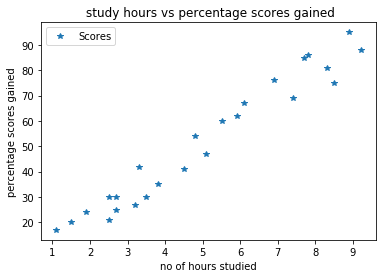

In [6]:
dataset.plot(x='Hours', y='Scores', style='*')
plt.title(' study hours vs percentage scores gained')
plt.xlabel('no of hours studied')
plt.ylabel('percentage scores gained')
plt.show()

## data pre processing

In [7]:
x= dataset.iloc[:,:-1].values
print(x)
y= dataset.iloc[:,1].values
print('\n',y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]

 [21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


## splitting the dataset 

In [8]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0) 

## Fitting linear regression model into the training set
### {train the dataset}


In [10]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(x_train, y_train) 

print("training done")

#regression coefficient and regression intercept are
print('regression coefficient',regressor.coef_, )
print('regression intercept',regressor.intercept_,)

training done
regression coefficient [9.91065648]
regression intercept 2.018160041434662


#### plotting regression line

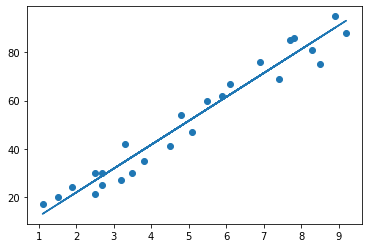

In [11]:
line= regressor.intercept_+ regressor.coef_*x
plt.scatter(x,y)
plt.plot(x,line)
plt.show()

## predict scores using test set

In [12]:
print(x_test)
predicted_y= regressor.predict(x_test)
print('\n predicted y (means percentage scores)')
print(predicted_y)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]

 predicted y (means percentage scores)
[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


## compare actual and predicted scores


In [13]:
comparison_df= pd.DataFrame({'actual scores': y_test, 'predicted scores': predicted_y})
print(comparison_df)

   actual scores  predicted scores
0             20         16.884145
1             27         33.732261
2             69         75.357018
3             30         26.794801
4             62         60.491033


### predict percentage gain when no of study hours is 9.25

 ## predicted on own  value

In [14]:
study_hours= 9.25
predict_scores= regressor.intercept_+ regressor.coef_*(study_hours)
print(predict_scores)

[93.69173249]


## evaluate the model

In [15]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predicted_y))


Mean Absolute Error: 4.183859899002982


#### hence in last our model calculate 93.7% scores for the study hours of 9.25 with the aboslute error 4.18 overall. 